# Survey Text Preferences: Exploring Tone Patterns

In [4]:
import pandas as pd
import re

In [5]:
df = pd.read_excel('second dataset.xlsx')
df.head(2)

,id,age,gender,ethnicity,race,education,marital_status,income,employment,language,...,sample_4,sample_4_text,sample_5,sample_5_text,sample_6,sample_6_text,sample_7,sample_7_text,sample_8,sample_8_text
0,1,45-54,female,hispanic,native american,Bachelor,single,"Less than $25,000",Employed Part time,english,...,Simplier,"Every Tuesday, Wednesday, and Thursday, people...",Persuasive,Last Friday held a touching moment for East Ha...,Empathetic,It's heart-wrenching to acknowledge that when ...,Simplier,Part of what makes food insecurity so difficul...,Simplier,Tomorrow represents a tough turning point for ...
1,2,25-34,male,non hispanic,black,Bachelor,widowed,"$50,000 - $74,999",Unemployed,spanish,...,Empathetic,In the face of the imminent expiration of cruc...,Empathetic,When women and girls cant access the period an...,Empathetic,Our trucks deliver #freshproduce and shelf-sta...,Persuasive,"At the Food Bank For New York City, we underst...",Persuasive,"Don't miss this! Last month, Food Bank For New..."


In [6]:
df.columns

Index(['id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')

In [7]:
df.shape

(35, 32)

In [8]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')
(35, 32)
na value count 0


In [9]:
# Check for NaN values in the entire DataFrame
print(df.isna().sum())
print(df.dtypes)

id                   0
age                  0
gender               0
ethnicity            0
race                 0
education            0
marital_status       0
income               0
employment           0
language             0
disability           0
states               0
start_time           0
end_time             0
id.1                 0
sample_options_id    0
sample_1             0
sample_1_text        0
sample_2             0
sample_2_text        0
sample_3             0
sample_3_text        0
sample_4             0
sample_4_text        0
sample_5             0
sample_5_text        0
sample_6             0
sample_6_text        0
sample_7             0
sample_7_text        0
sample_8             0
sample_8_text        0
dtype: int64
id                            int64
age                          object
gender                       object
ethnicity                    object
race                         object
education                    object
marital_status               object

In [10]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],
                      var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
final_data.drop(['race', 'language', 'marital_status'], axis=1, inplace=True)
final_data.head(12)


,age,gender,ethnicity,education,income,employment,disability,choice
0,45-54,female,hispanic,Bachelor,"Less than $25,000",Employed Part time,i do not have a disability,Original
1,25-34,male,non hispanic,Bachelor,"$50,000 - $74,999",Unemployed,i do not have a disability,Simplier
2,45-54,male,hispanic,less than high school,"Less than $25,000",Employed Full time,i do not have a disability,Simplier
3,55-64,female,non hispanic,Associate,"$25,000 - $49,999",Employed Full time,i do not have a disability,Persuasive
4,25-34,female,hispanic,Associate,"Less than $25,000",Employed Full time,i do not have a disability,Empathetic
5,45-54,female,hispanic,less than high school,"$25,000 - $49,999",Employed Full time,i do not have a disability,Simplier
6,45-54,female,hispanic,Bachelor,"$50,000 - $74,999",Employed Full time,i do not have a disability,Simplier
7,45-54,male,hispanic,Bachelor,"$50,000 - $74,999",Employed Full time,i do not have a disability,Simplier
8,25-34,male,hispanic,less than high school,"Less than $25,000",Employed Full time,i do not have a disability,Original
9,45-54,female,hispanic,High School,"Less than $25,000",Employed Part time,i do not have a disability,Persuasive


In [11]:
final_data.shape

(280, 8)

In [12]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
def disability_status(disability_status):
    if disability_status.lower() == "i do not have a disability":
        return "no disability"
    elif disability_status.lower() == "i have a disability":
        return "has disability"
    elif disability_status.lower() == "na":
        return "undisclosed"
    else:
        return disability_status
    

In [13]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
# final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
# final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
# final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(disability_status)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [14]:
# Creating interaction variable: 'Gender-Marital Status'
# final_data['Gender-Marital Status'] = final_data['gender'] + '-' + final_data['marital_status']

In [15]:
# final_data.drop(['gender', 'marital_status'], axis=1, inplace=True)

In [16]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

In [17]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)

In [18]:
final_data.shape

(280, 8)

In [19]:
final_data.head(3)

,age,gender,ethnicity,education,income,employment,disability,choice
0,3,female,hispanic,Bachelor,0,Employed Part time,no disability,Original
1,1,male,non hispanic,Bachelor,2,Unemployed,no disability,Simplier
2,3,male,hispanic,less than high school,0,Employed Full time,no disability,Simplier


In [20]:
encoded_data = pd.get_dummies(final_data, drop_first=True)

In [21]:
encoded_data.shape

(280, 18)

In [22]:
encoded_data

,age,income,gender_male,ethnicity_non hispanic,education_Bachelor,education_High School,education_Master,education_less than high school,education_undisclosed,employment_Employed Part time,employment_Retired,employment_Self employed,employment_Student,employment_Unemployed,disability_undisclosed,choice_Original,choice_Persuasive,choice_Simplier
0,3,0,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
1,1,2,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,3,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,4,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
276,1,1,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
277,1,-1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
278,1,2,True,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False


In [23]:
encoded_data.columns

Index(['age', 'income', 'gender_male', 'ethnicity_non hispanic',
       'education_Bachelor', 'education_High School', 'education_Master',
       'education_less than high school', 'education_undisclosed',
       'employment_Employed Part time', 'employment_Retired',
       'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'disability_undisclosed', 'choice_Original',
       'choice_Persuasive', 'choice_Simplier'],
      dtype='object')

In [24]:
encoded_data.shape

(280, 18)

In [25]:
encoded_data.to_excel('larger_data.xlsx', index=False)

## Model Training

In [26]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Train-Test-Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = encoded_data

In [29]:
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)

# Dimensionality reduction
## PCA
The first principal component of the data is the direction in which the data varies the most

In [32]:
encoded_data.columns

Index(['age', 'income', 'gender_male', 'ethnicity_non hispanic',
       'education_Bachelor', 'education_High School', 'education_Master',
       'education_less than high school', 'education_undisclosed',
       'employment_Employed Part time', 'employment_Retired',
       'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'disability_undisclosed', 'choice_Original',
       'choice_Persuasive', 'choice_Simplier'],
      dtype='object')

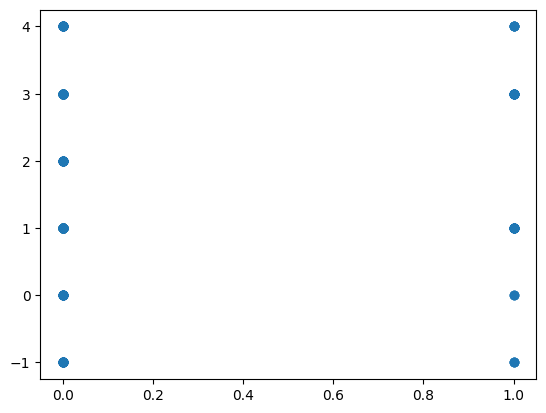

In [34]:
plt.scatter(encoded_data['choice_Persuasive'], encoded_data['age'])

In [36]:
from sklearn.decomposition import PCA


In [37]:
model = PCA()


In [38]:
model.fit(encoded_data)

PCA()

In [39]:
mean = model.mean_

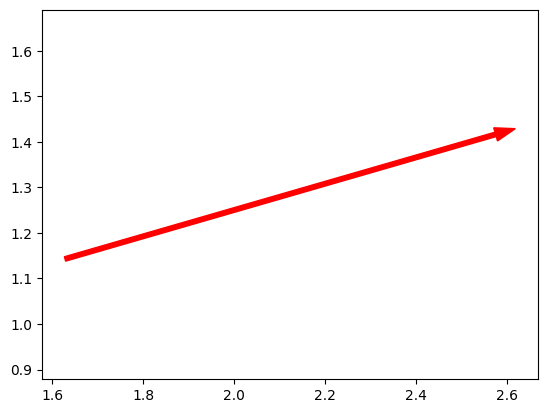

In [40]:
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on the same scale
plt.axis('equal')
plt.show()

pca = PCA(n_components=2)

In [41]:
pca = PCA(n_components=2)

In [42]:
pca.fit(encoded_data)

PCA(n_components=2)

In [45]:
pca_features = pca.transform(encoded_data)

In [46]:
print(pca_features.shape)

(280, 2)


### KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(encoded_data)


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
model = KMeans(n_clusters=3, n_init=10,random_state=10)
model.fit(X_train)
labels = model.predict(X_test)

silhouette_avg = silhouette_score(X_test, labels)
# print(labels)
print(model.inertia_)
# print(silhouette_avg)

423.015877868819


### Inspect clustering

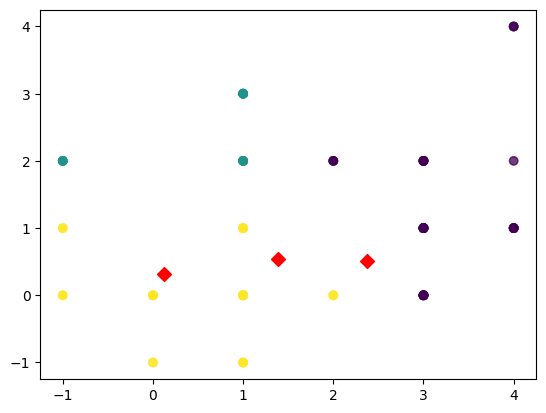

In [ ]:
xs = X_test.iloc[:,0]
ys = X_test.iloc[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 2]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50, c='red')

# Show the plot
plt.show()

Silhouette analysis for different numbers of clusters (n_clusters) in order to determine the optimal number of clusters for the KMeans clustering algorithm.

For n_clusters = 2 The average silhouette_score is : 0.274496984551191


For n_clusters = 3 The average silhouette_score is : 0.28601410637042546
For n_clusters = 4 The average silhouette_score is : 0.23078810240400272
For n_clusters = 5 The average silhouette_score is : 0.24061565112621436


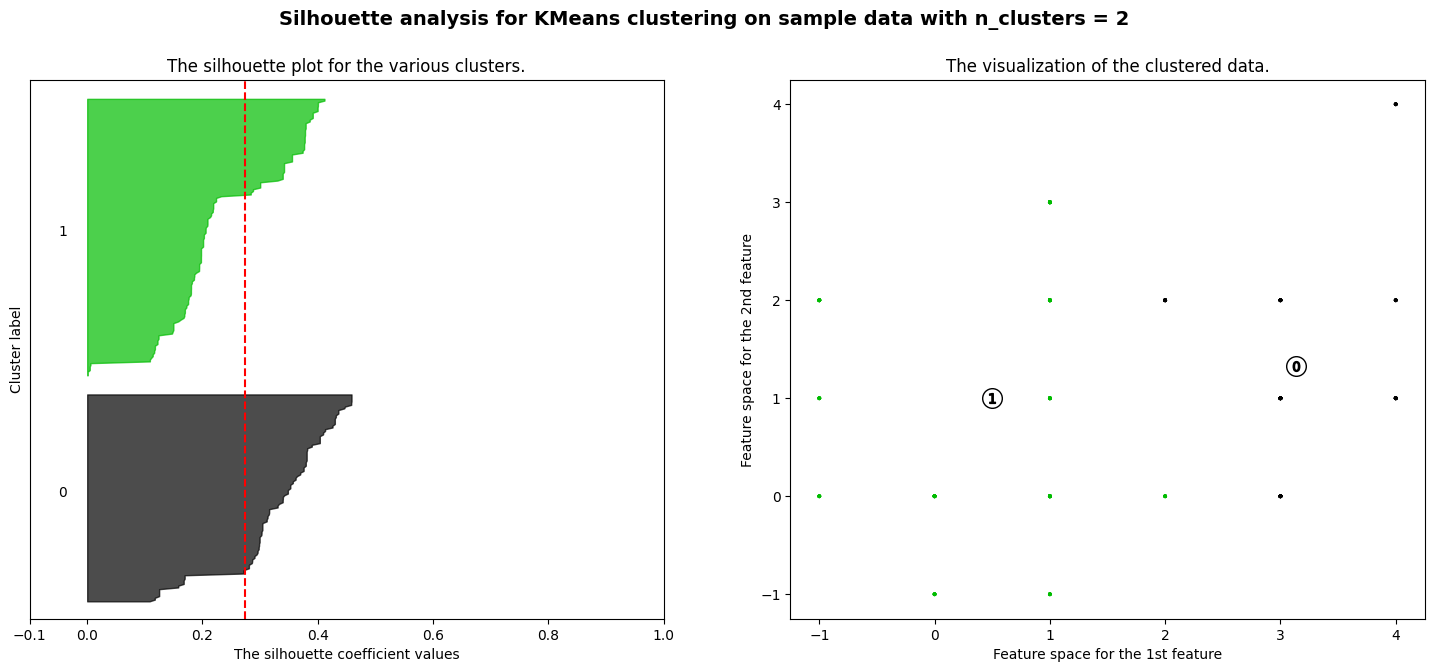

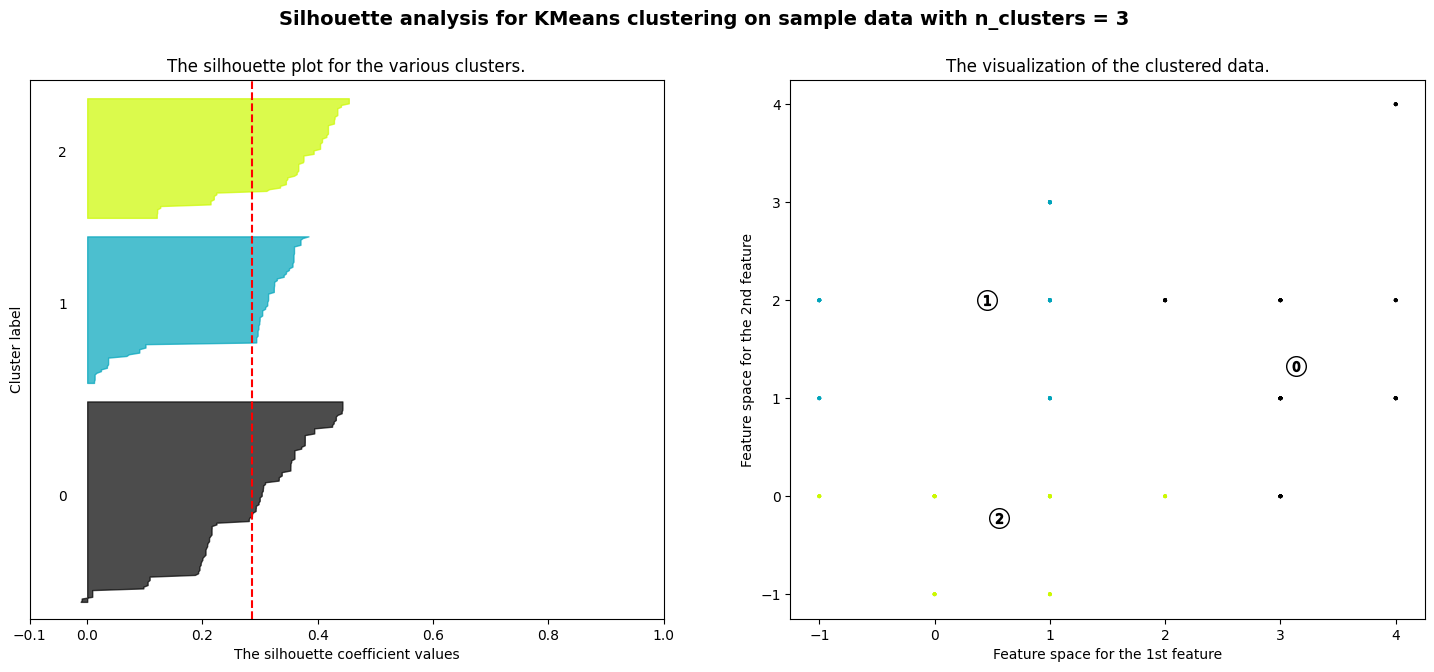

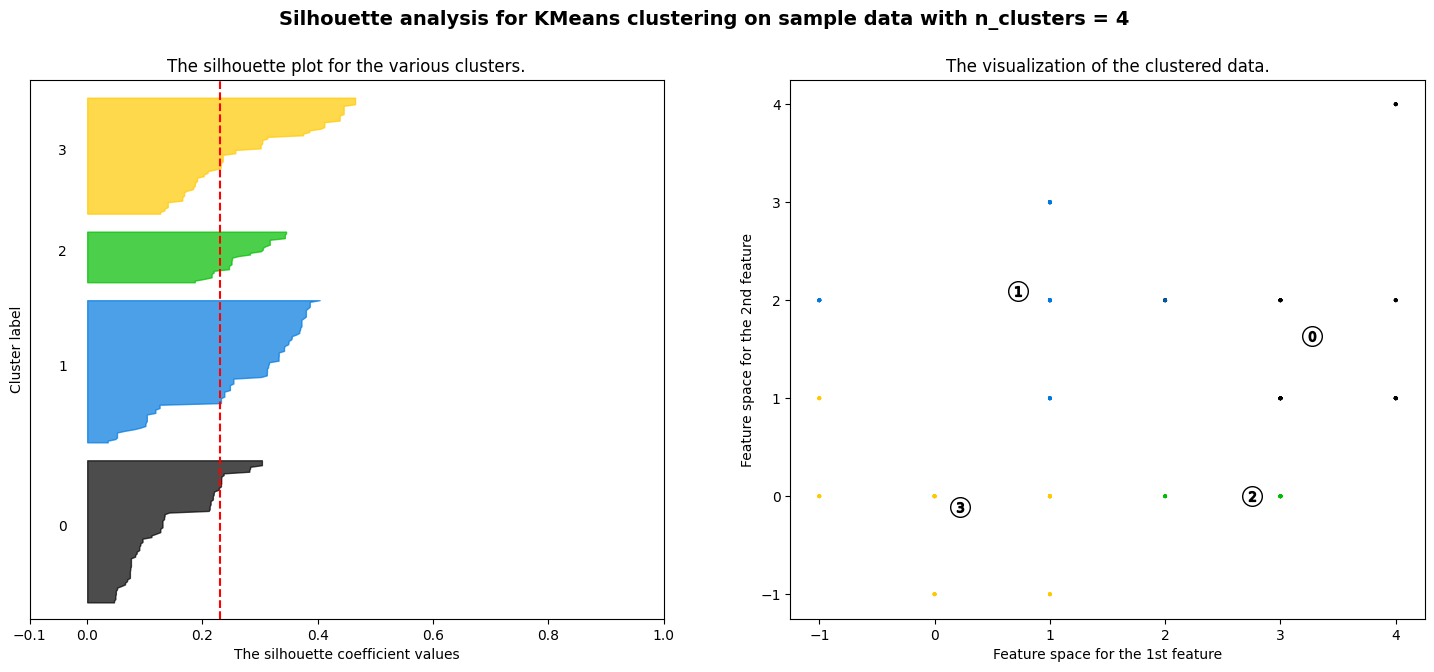

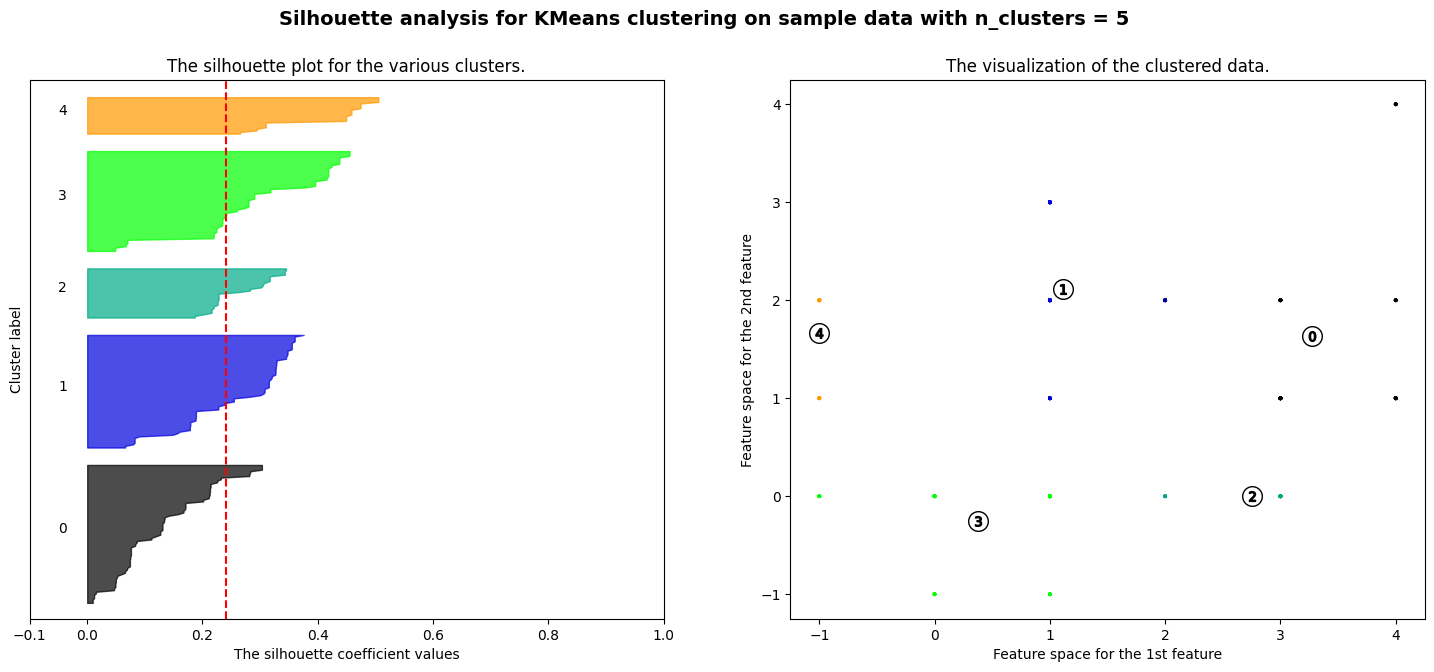

In [ ]:
X = encoded_data.values  
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Elbow method

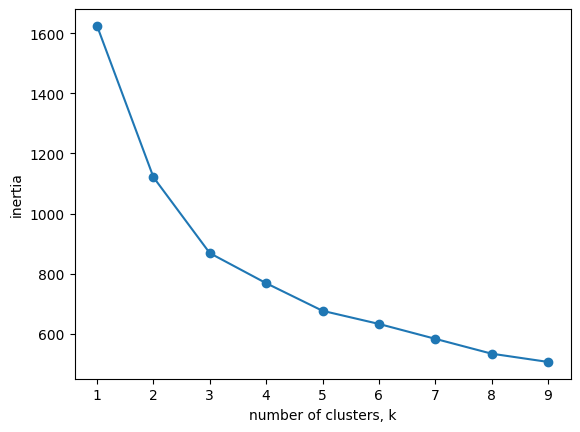

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)
    
    # Fit model to samples
    model.fit(encoded_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
inertias

[1623.9392857142864,
 1121.1374999999998,
 868.8417658730159,
 768.9728365384616,
 677.2014204545455,
 633.590625,
 584.0905366724155,
 534.703125,
 507.3164630325815]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(encoded_data)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(encoded_data)

In [ ]:
pipeline = make_pipeline(scaler, model)

In [ ]:
pipeline.fit(encoded_data)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=9, n_init=10))])

In [ ]:
labels = pipeline.predict(encoded_data)